C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:57:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


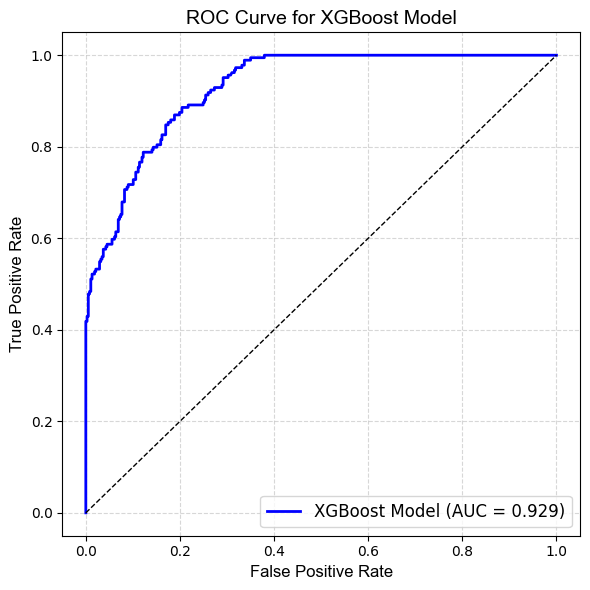

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
df = pd.read_excel("CACS_dataset_with_binary.xlsx")

# 2. Feature와 Outcome 설정
features = ['age', 'BMI', 'SBP', 'DBP', 'TC', 'LDL', 'HDL', 'TG', 'CRP', 'eGFR', 'NLR']
X = df[features]
y = df['CACS_binary']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. XGBoost 모델 생성 및 학습
model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 ROC curve 계산
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 6. 제출용 ROC Curve 시각화 및 저장
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'XGBoost Model (AUC = {roc_auc:.3f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12, fontname='Arial')
plt.ylabel('True Positive Rate', fontsize=12, fontname='Arial')
plt.title('ROC Curve for XGBoost Model', fontsize=14, fontname='Arial')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 7. 고해상도 저장 (TCT 제출용)
plt.savefig("XGBoost_ROC_TCT_final.png", dpi=300, bbox_inches='tight')
plt.savefig("XGBoost_ROC_TCT_final.pdf", dpi=300, bbox_inches='tight')

plt.show()
